# Ranges

A [bioframe](https://bioframe.readthedocs.io/en/latest/) based realization of genomic ranges integration in MuData

`RangeAnnData` is an extension class to the AnnData class

## Prepare data

In [1]:
import numpy as np
import pandas as pd
import anndata as ad
from scipy.sparse import csr_matrix
from mudata import MuData
import mudata as md
from anndata import AnnData
import pyranges as pr
import bioframe as bf

from RangeAnnData import RangeAnnData, RangeMuData

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Generation of toy dataset

- Count matrix: sparse data with `scipy.csr_matrix`
- genomic ranges: provided by `PyRanges`
- Make sure the naming of columns follow the bed file format

In [2]:
counts = csr_matrix(np.random.poisson(1, size=(100, 1000)), dtype=np.float32)
exons, gr = pr.data.exons().df, pr.data.cpg().df
exons = exons.sample(frac=1, replace=False)

exons.columns = ['chrom', 'start', 'end'] + list(exons.columns[3:])
gr.columns = ['chrom', 'start', 'end']+ list(gr.columns[3:])

## Build AnnData object out of the dataset

In [3]:
adata = RangeAnnData(counts)
adata.obs_names = [f"Cell_{i:d}" for i in range(adata.n_obs)]
adata.var_names = [f"Gene_{i:d}" for i in range(adata.n_vars)]

Coordinates are integrated into `RangedAnnData` with `varm` by method `set_coord`

In [4]:
adata.set_coord(exons)
adata.varm['coord']

,chrom,start,end,Name,Score,Strand
Gene_0,chrX,147733519,147733640,NM_001169125_exon_1_0_chrX_147733520_f,0,+
Gene_1,chrX,30718954,30719022,NM_001128127_exon_9_0_chrX_30718955_f,0,+
Gene_2,chrX,16875716,16875832,NM_002893_exon_7_0_chrX_16875717_r,0,-
Gene_3,chrX,128674251,128674455,NM_000276_exon_0_0_chrX_128674252_f,0,+
Gene_4,chrX,83588766,83588850,NM_001177479_exon_2_0_chrX_83588767_r,0,-
...,...,...,...,...,...,...
Gene_995,chrX,15838329,15838439,NM_005089_exon_9_0_chrX_15838330_f,0,+
Gene_996,chrX,1407411,1407535,NM_172249_exon_4_0_chrX_1407412_f,0,+
Gene_997,chrX,31893307,31893490,NM_004010_exon_31_0_chrX_31893308_r,0,-
Gene_998,chrX,73744193,73744644,NM_006517_exon_2_0_chrX_73744194_f,0,+


## Filter by genomic ranges: `slice_granges`

Original data size:

In [5]:
adata.shape

(100, 1000)

Sometimes features are defined in some coordinate system such as a linear _genome sequence_ — for instance in assays that measure chromatin accessibility, transcription factor occupancy, DNA methylation. In fact, genes also have a property defining their location in the DNA, even though that's something frequently ignored in transcriptomics analysis pipelines.

Typically AnnData/MuData objects are subsetted (or _sliced_) along the feature dimension using method `slice_granges`


In [6]:
adata.slice_granges('chrX', 1, 1500000).shape

(100, 11)

## Intersection with a list of genomic ranges

- Input: List of genomic ranges in pandas dataframe
- Output: Subsetted AnnData object with inner overlapping with 

In [7]:
adata.subset_by_overlap(gr).varm['coord']

,chrom,start,end,Name,Score,Strand
Gene_142,chrY,16941609,16942399,NM_014893_exon_4_0_chrY_16941610_f,0,+
Gene_849,chrY,155399,155536,NR_028057_exon_3_0_chrY_155400_f,0,+
Gene_660,chrY,244667,245252,NM_013239_exon_0_0_chrY_244668_r,0,-
Gene_493,chrY,1363220,1363354,NM_172246_exon_7_0_chrY_1363221_f,0,+
Gene_351,chrY,14533348,14533389,NR_033667_exon_4_0_chrY_14533349_r,0,-
...,...,...,...,...,...,...
Gene_423,chrX,150066994,150067289,NM_031462_exon_10_0_chrX_150066995_r,0,-
Gene_988,chrX,150565656,150565833,NM_001017980_exon_0_0_chrX_150565657_f,0,+
Gene_978,chrX,153046670,153046801,NM_014370_exon_1_0_chrX_153046671_f,0,+
Gene_851,chrX,153599240,153599729,NM_001456_exon_45_0_chrX_153599241_r,0,-


In [28]:
bf.coverage(exons, gr)[bf.coverage(exons, gr).coverage>0]

,chrom,start,end,Name,Score,Strand,coverage
3,chrX,128674251,128674455,NM_000276_exon_0_0_chrX_128674252_f,0,+,204
16,chrX,45016959,45017133,NM_176819_exon_2_0_chrX_45016960_r,0,-,156
19,chrX,120108921,120109918,NM_001080137_exon_2_0_chrX_120108922_r,0,-,848
20,chrX,17879217,17879457,NM_001172739_exon_2_0_chrX_17879218_r,0,-,238
29,chrX,48814238,48814893,NM_017602_exon_8_0_chrX_48814239_r,0,-,626
...,...,...,...,...,...,...,...
973,chrX,48367346,48367491,NM_203475_exon_0_0_chrX_48367347_f,0,+,145
977,chrX,18443724,18443815,NM_003159_exon_0_0_chrX_18443725_f,0,+,91
978,chrX,153046670,153046801,NM_014370_exon_1_0_chrX_153046671_f,0,+,98
982,chrX,102884421,102884489,NM_001006639_exon_1_0_chrX_102884422_f,0,+,53


In [34]:
bf.count_overlaps(exons, gr)[bf.count_overlaps(exons, gr)['count']>0].sort_values('count')

,chrom,start,end,Name,Score,Strand,count
3,chrX,128674251,128674455,NM_000276_exon_0_0_chrX_128674252_f,0,+,1
731,chrX,148586564,148586884,NM_006123_exon_7_0_chrX_148586565_r,0,-,1
727,chrX,120070015,120071012,NM_001080138_exon_2_0_chrX_120070016_r,0,-,1
695,chrX,153067622,153070355,NM_032512_exon_0_0_chrX_153067623_r,0,-,1
660,chrY,244667,245252,NM_013239_exon_0_0_chrY_244668_r,0,-,1
...,...,...,...,...,...,...,...
190,chrX,153284647,153284779,NM_001025243_exon_10_0_chrX_153284648_r,0,-,1
174,chrX,48768822,48769235,NM_001042498_exon_3_0_chrX_48768823_r,0,-,1
320,chrY,15591393,15592550,NR_047610_exon_27_0_chrY_15591394_r,0,-,1
988,chrX,150565656,150565833,NM_001017980_exon_0_0_chrX_150565657_f,0,+,1


In [38]:
bf.overlap(exons, gr, how='inner')[bf.overlap(exons, gr, how='inner')['start']== 34147868]

,chrom,start,end,Name,Score,Strand,chrom_,start_,end_,CpG_
11,chrX,34147868,34150447,NM_203408_exon_0_0_chrX_34147869_r,0,-,chrX,34148740,34148957,25
12,chrX,34147868,34150447,NM_203408_exon_0_0_chrX_34147869_r,0,-,chrX,34149264,34149486,20


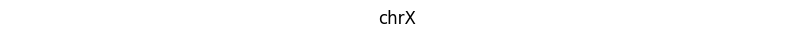

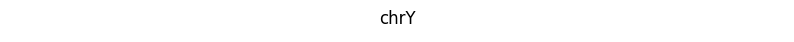

In [39]:
bf.vis.plot_intervals(bf.overlap(exons, gr, how='inner'))

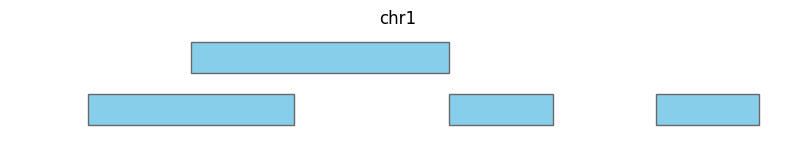

In [41]:
bf.vis.plot_intervals(df1)

In [18]:
df1 = pd.DataFrame([
    ['chr1', 1, 5],
    ['chr1', 3, 8],
    ['chr1', 8, 10],
    ['chr1', 12, 14]],
    columns=['chrom', 'start', 'end']
)

In [20]:
df2 = bf.from_any(
    [['chr1', 4, 8],
     ['chr1', 10, 11]], 
    name_col='chrom')

In [27]:
bf.coverage(df1, df2)

,chrom,start,end,coverage
0,chr1,1,5,1
1,chr1,3,8,4
2,chr1,8,10,0
3,chr1,12,14,0
